In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os

## We have simulation results for 40 ysensors for each of the 196 positions approx. 5 cm apart from each other to cover the 2m y-length of the panel (real-world x). At first, we observe the 'with racking' scenario. 

In [3]:
testfolder = r'C:\Users\sayala\Documents\INTERNS\SHAMSUL'

In [5]:
data_with = pd.read_csv(os.path.join(testfolder,'COMPILED_Results_WITH_19AUG_complete.csv'), index_col = 0)
data_without = pd.read_csv(os.path.join(testfolder,'COMPILED_Results_WITHOUT_19AUG_complete.csv'), index_col = 0)

In [8]:
# Just a function to flip the columns (required for x and associated readings to be put as from east to west)
def df_correct(df):
    return df[df.columns[::-1]]

### WITH

In [18]:
Wm2Front_with = data_with["Wm2Front"].str.strip('[]').str.split(',', expand=True).astype(float)
Wm2Back_with = data_with["Wm2Back"].str.strip('[]').str.split(',', expand=True).astype(float)
Wm2Front_with_w2e = df_correct(Wm2Front_with)
data_backirr_with = df_correct(Wm2Back_with)


In [16]:
# Clean this up
r'''
x = data_with["x"].str.strip('[]').str.split(',', expand=True).astype(float)
y = data_with["y"].str.strip('[]').str.split(',', expand=True).astype(float)
x_w2e = df_correct(x)
data_backirr_with = Wm2Back_with_w2e
y_vals = y.iloc[:,0]
data_backirr_with.set_index(y_vals)
data_backirr_with.columns = x_w2e.iloc[0,:]
data_backirr_with.set_index(y_vals, inplace = True)
''';

### WITHOUT

In [19]:
Wm2Front_without = data_without["Wm2Front"].str.strip('[]').str.split(',', expand=True).astype(float)
Wm2Back_without = data_without["Wm2Back"].str.strip('[]').str.split(',', expand=True).astype(float)
Wm2Front_without_w2e = df_correct(Wm2Front_without)
data_backirr_without = df_correct(Wm2Back_without)


In [ ]:
#data_backirr_without = data_backirr_with
#data_backirr_without.iloc[:,:] = Wm2Back_without_w2e

In [20]:
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)

In [23]:
minboth = min(np.min(data_backirr_with).min(), np.min(data_backirr_without).min())
maxboth = max(np.max(data_backirr_with).max(), np.max(data_backirr_without).max())

In [25]:
data_backirr_without.iloc[100]

39     83.45982
38     82.32536
37     81.06128
36     79.79721
35     78.53314
34     77.26972
33     72.78264
32     71.48058
31     70.17853
30     68.87737
29     64.67188
28     62.58756
27     60.50481
26     50.34290
25     49.39249
24     48.44391
23     47.09129
22     50.22540
21     60.96918
20     65.01859
19     37.69977
18     36.57790
17     43.67953
16     46.57549
15     68.90295
14     70.52783
13     72.15270
12     73.77758
11     75.40018
10     77.67561
9      79.83962
8      82.00112
7      86.42432
6      89.26138
5      92.09845
4      94.93251
3     100.86230
2     103.47830
1     106.09420
0     108.70740
Name: 100, dtype: float64

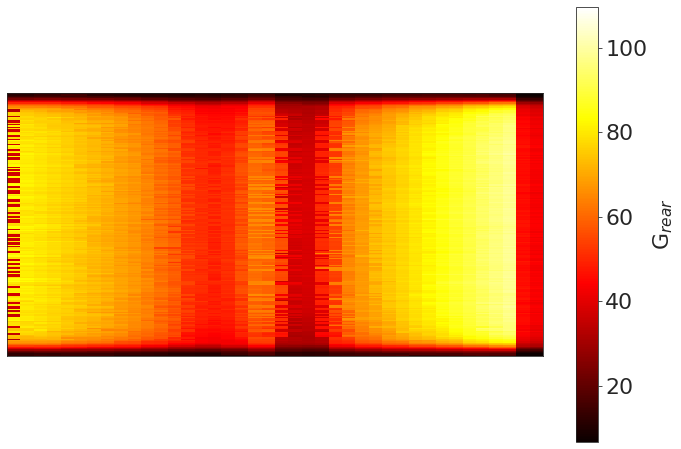

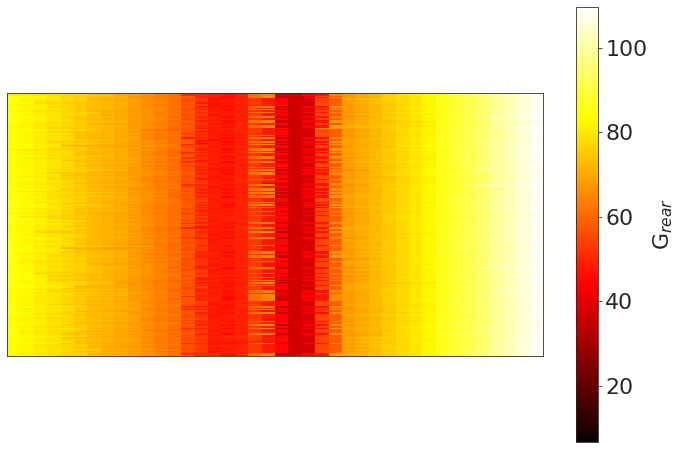

In [24]:
with sns.axes_style("white"):
    fig = plt.imshow(data_backirr_with, cmap='hot', vmin=minboth, 
                     vmax=maxboth, interpolation='none', aspect = 0.1)
    plt.colorbar(label='G$_{rear}$')
    #plt.title('Yearly Bifacial, in matrix form')
    fig.axes.get_yaxis().set_visible(False)
    fig.axes.get_xaxis().set_visible(False)
    
plt.figure()

with sns.axes_style("white"):
    fig = plt.imshow(data_backirr_without, cmap='hot', vmin=minboth, 
                     vmax=maxboth, interpolation='none', aspect = 0.1)
    plt.colorbar(label='G$_{rear}$')
    #plt.title('Yearly Bifacial, in matrix form')
    fig.axes.get_yaxis().set_visible(False)
    fig.axes.get_xaxis().set_visible(False)

This is just the preliminary analysis for a morning hour (11am) of a clear-sky day (29th April, 2021). Way to go!!!